<a href="https://colab.research.google.com/github/GwiHwan-Go/Reproduce_CutMix/blob/main/utills/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
print(torch.cuda.memory_allocated()/1024**2)

0.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


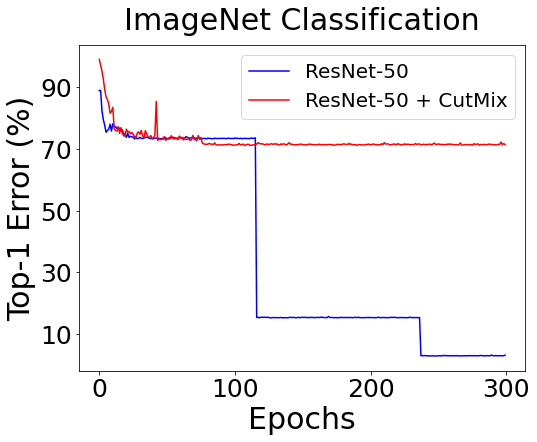

In [10]:
def plot_(independent,dependent) :
    """
    """
        
    fig = plt.figure(1, figsize=(8,6))

    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()

    args_plot1 = [range(len(independent)), independent]
    args_plot2 = [range(len(dependent)), dependent]

    config_plot1 = dict(
        color='blue',
        linestyle='solid',
    )
    config_plot2 = dict(
        color='red',
        linestyle='solid',
    )

    ax1.plot(label='ResNet-18', *args_plot1, **config_plot1) ###<--- change label of plot graph (blue one)
    ax2.plot(label='ResNet-18 + CutMix', *args_plot2, **config_plot2) ###<--- change label of plot graph (red one)
    
    plt.legend(loc='upper right', fontsize=20, shadow=False) ## 범례 생성 - 그림자 효과 추가
    
    plt.ylabel('Top-1 Error (%)',rotation=90, fontsize=30) ###<--- change y-label of plot graph
    plt.xlabel('Epochs',fontsize=30) ## x축 라벨

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25) ## y축 눈금 크기 설정
    
    ax1.set_xticks([0,100,200,300])
    ax2.set_xticks([0,100,200,300])

    ax1.set_yticks([10,30,50,70,90])
    ax2.set_yticks([10,30,50,70,90])

    plt.title(f"ImageNet Classification",fontsize=30, pad=15) ##<- change title of plot graph

    plt.show()


PATH1 = "/content/drive/MyDrive/DL1/tinyImagenet/tinyImagenet_resnet50_Baseline.pt" #blue one
PATH2 = "/content/drive/MyDrive/DL1/tinyImagenet/tinyimagenet_resnet50_cutout.pt" #red one
checkpoint1 = torch.load(PATH1, map_location=torch.device('cpu'))
checkpoint2 = torch.load(PATH2, map_location=torch.device('cpu'))


test1 = checkpoint1['top1_err'] #blue one
test2 = checkpoint2['top1_err'] #red one

plot_(test1, test2)

최종 err 출력

In [5]:
PATH1 = "/content/drive/MyDrive/DL1/cifar100Imagenet/baseline_tiny_new/TinyImagenet_Resent18_Baseline.pt" #File
checkpoint1 = torch.load(PATH1, map_location=torch.device('cpu'))
print('top-1 err: {:.2f}'.format(checkpoint1['top1_err'][-1]))
print('top-5 err: {:.2f}'.format(checkpoint1['top5_err'][-1]))

top-1 err: 55.04
top-5 err: 29.98
